<h1><center>Лабораторная работа 1. Решение нелинейных уравнений</center></h1>

# Задание I

Задано уравнение $$ f(x)=x-2e^{-x}, x \in R $$

Инициализируем уравнение функцией

In [2]:
import math
import numpy as np
def f(x):
    return(x-2*math.exp(-x))

## Задание IA. 

## Метод бисекции

### Описание метода
Метод бисекции или метод деления отрезка пополам — простейший численный метод для решения нелинейных уравнений вида f(x)=0. Предполагается только непрерывность функции f(x). Поиск основывается на теореме о промежуточных значениях.

### Алгоритм метода
1. Выбирается середина отрезка [a,b].
2. Находится значение функции в середине отрезка.
3. Если функция /F(x)/ < ɛ прерываем алгоритм, иначе переходим к шагу 4.
4. Если F(a)*F(x)<0. Отрезок сдвигается до [a,x], иначе [b,x].
5. Возвращаемся к шагу 1.

In [3]:
def bisection(a,b,f,max_iterations):
    x=(a+b)/2
    i=0
    while (abs(f(x))>=10**-6 and i<max_iterations):
        x=(a+b)/2
        a,b =(a,x) if f(a)*f(x)<0 else (x,b)
        i+=1
    return x
print(bisection(0,1,f,3))

0.875


Результат метода бисекции: 0.875

## Метод хорд

Метод хорд — итерационный численный метод приближённого нахождения корня уравнения.

В отличие от метода половинного бисекции, метод хорд предлагает, что деление рассматриваемого интервала будет выполняться не в его середине, а в точке пересечения хорды с осью абсцисс (ось - Х). Следует отметить, что под хордой понимается отрезок, который проведен через точки рассматриваемой функции по концам рассматриваемого интервала. Рассматриваемый метод обеспечивает более быстрое нахождение корня, чем метод половинного деления, при условии задания одинакового рассматриваемого интервала., 

### Алгоритм метода

1. Вычислить i-1 член
2. Вычислить i член
3. Проверить условие сходимости

In [4]:
def chord(a,b,f,max_iterations):
    i=0
    while (abs(f(a)-f(b))>=10**-6 and i<max_iterations):
        a=b-(f(b)*(b-a)/(f(b)-f(a)))
        b=a-(f(a)*(a-b)/(f(a)-f(b)))
        i+=1
    return b
print(chord(0,1,f,3))

0.8526055020137255


Результат метода хорд: 0.8526055020137255

## Метод Ньютона

Метод Ньютона, алгоритм Ньютона (также известный как метод касательных) — это итерационный численный метод нахождения корня (нуля) заданной функции. Метод был впервые предложен английским физиком, математиком и астрономом Исааком Ньютоном (1643—1727). Поиск решения осуществляется путём построения последовательных приближений и основан на принципах простой итерации. Метод обладает квадратичной сходимостью. Модификацией метода является метод хорд и касательных. Также метод Ньютона может быть использован для решения задач оптимизации, в которых требуется определить ноль первой производной либо градиента в случае многомерного пространства.

Получается на основе разложения Тейлора.

In [5]:
def Newton(f,x,max_iterations):
    i=0
    while (abs(f(x))>=10**-6 and i<max_iterations):
        x=x-f(x)/dx(x)
        i+=1
    return x
print(Newton(f,1,3))

NameError: name 'dx' is not defined

Результат метода хорд: 0.8526055020070299

## Задание IB

## Задание IC

![Mathlab Roots](https://i.imgur.com/teBoF69.png)

## Задание ID

In [6]:
def SteffensenRoot(f,x):
    i=0
    while (abs(f(x))>=10**-6 and i<100):
        x=x-((f(x)*f(x))/(f(x+f(x))-f(x)))
        i+=1
    if (i==100 and abs(f(x))>=10**-6):
        print("Метод не работает. Попробуйте подобрать наилучшее приближение.")
        exit(0)
    print(i)
    return x

Результат 0.8526053627857594

| Бисекция     | Хорды       | Ньютон     | Стеффенсен (Matlab) | Стеффенсен (Python) |
|:------------:|:-----------:|:----------:|:-------------------:|:-------------------:|
| 0.875        | 0.8526055   | 0.8526055  | 0.8526055           | 0.8526053627857594  |

## Задание II

In [7]:
import matplotlib.pyplot as plt
def Task2(th,tc,jc,jh):
    thplt=[th]
    tcplt=[tc]
    jcplt=[jc]
    jhplt=[jh]
    for i in range(100):
        tc=((jc-17.41*tc+5188.18)/(5.67*10**-8))**(1/4)
        th=((2250+jh-1.865*th)/(5.67*10**-8))**(1/4)
        jc=2352.71+0.71*jh-7.46*tc
        jh=11093+0.71*jc-7.46*th
        tcplt.append(abs(tc-481))
        thplt.append(abs(th-671))
        jcplt.append(abs(jc-6222))
        jhplt.append(abs(jc-10504))
    print(tc, th, jc, jh)
    plt.plot(tcplt)
    plt.show()
    plt.plot(thplt)
    plt.show()
    plt.plot(jcplt)
    plt.show()
    plt.plot(jhplt)
    plt.show()

(481.027179475961+0.00016172243351774635j) (671.1239731714975+1.0248911156310274e-05j) (6222.225418866012-0.0007232352923087433j) (10504.195207535497-0.0005899539347652824j)


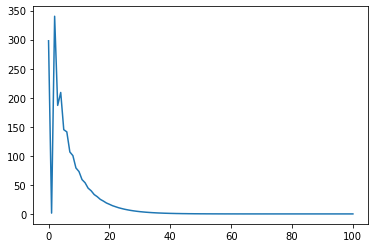

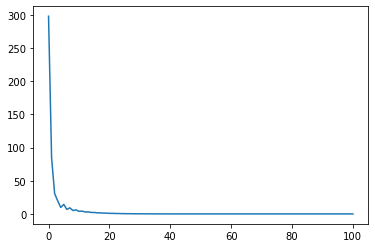

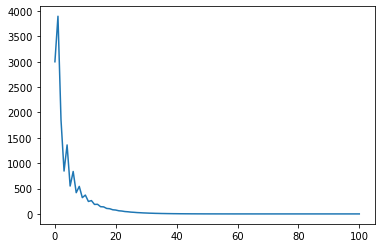

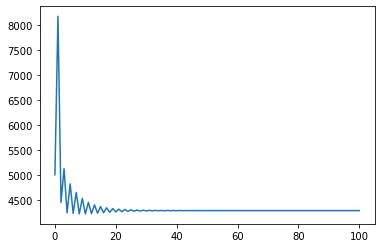

In [8]:
Task2(298,298,3000,5000)

Как видим графики сходятся, из чего можно сделать вывод о том, что данные функции могут быть использованы для решения системы методом фиксированной точки

## Задание III

In [9]:
def BiRegRoot(Fun,a,b,ErrMax):
    i=0
    x=0
    newx=0
    iteration_x=[]
    iteration_y=[]
    iteration=[]
    while i<100:
        if i==0:
            newx, BiFRoot,a,b=Bissection(Fun,a,b)
        else:
            RegRoot, RegFRoot, Rega, Regb = RegulaFalsi(Fun, a, b)
            BiRoot, BiFRoot, Bia, Bib = Bissection(Fun, a, b)
            if abs(BiFRoot) < abs(RegFRoot):
                a = Bia
                b = Bib
                newx = BiRoot
            else:
                a = Rega
                b = Regb
                newx = RegRoot
        iteration_x.append(newx)
        iteration_y.append(abs(Fun(newx)))
        iteration.append(i)
        if abs(Fun(newx)) < ErrMax:
            plt.plot(iteration, iteration_x)
            plt.show()
            plt.plot( iteration, iteration_y)
            plt.show()
            Xs = newx
            return Xs
        if (i == 99):
            print("Не работает")
        i = i + 1
        x = newx
        
        
def Bissection(Fun,a,b):
    root=(a+b)/2
    froot=Fun(root)
    if Fun(a)*froot<0:
        newa=a
        newb=root
    else:
        newa=root
        newb=b
    return root, froot, newa, newb

def RegulaFalsi(Fun,a,b):
    root=(a*Fun(b)-b*Fun(a))/(Fun(b)-Fun(a))
    froot=Fun(root)
    if Fun(a)*Fun(root)<0 :
        newa=a
        newb=root
    else:
        newa=root
        newb=b
    return root,froot,newa,newb

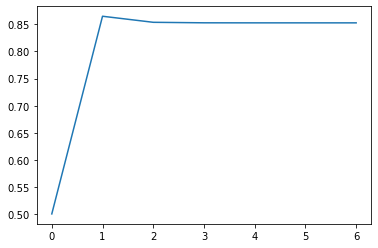

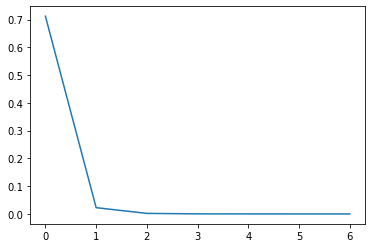

0.8526055522404338

In [10]:
BiRegRoot(f,0.001,1,0.0000001)

### Part B

Задача: Шар падает с высоты x метров за t секунд. Найдите с какой высоты он падает, если вам дано t секунд(например 5)

Решим уравнение $$ m=gt^2/2, m,t \in R, g=10 $$

Инициализируем уравнение

In [11]:
def f2(x):
    return 10*5*5/2-x

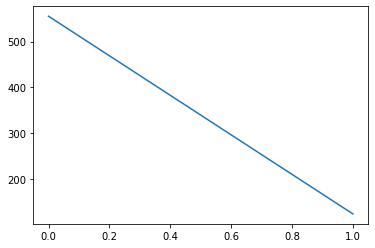

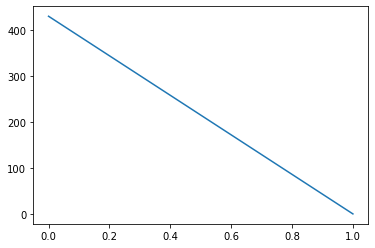

125.0

In [12]:
BiRegRoot(f2,110,1000,0.0000001)

## Задание IV

Инициализируем уравнение

In [13]:
def f3(x):
    return 2*x**3-4*x**2-4*x-20

Для данной задачи был выбран метод хорд, поскольку он решает данное уравнение всего за 3 итерации

In [14]:
chord(3,4,f3,1000)

3.431847522419904

![Mathlab Roots](https://imgur.com/py2N2aF.png)

Как видим результаты совпадают

## Задание V

Вариант 10. Решить нелинейное уравнение $5*ln(x)-x^{1/2}=0$

Для метода простых итераций нужно, чтобы соблюдалось условие $|g(x)'<1|$ Под это условие подходит только 1 вариант $g(x)=e^{\sqrt{x}/5}$

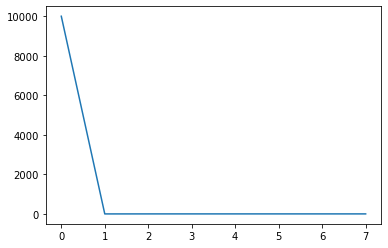

1.2506475301636295


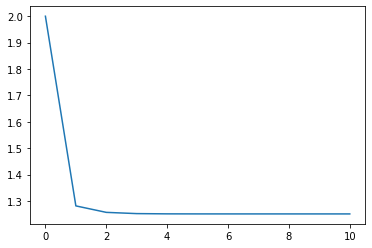

1.250652144404092


In [15]:
MyDerivative=lambda x:(1/x)*(x**(1/2)/2+5)

MyFunction= lambda x:5*math.log(x)-x**(1/2)
SimpleFlex=lambda x:math.exp(math.sqrt(x)/5)
def Newton(f,dx,x,max_iterations):
    i=0
    iterationx=[x]
    iteration=[i]
    while (abs(f(x))>=10**-7 and i<max_iterations):

        x=x-f(x)/dx(x)
        i+=1
        iterationx.append(x)
        iteration.append(i)
    
    plt.plot(iteration,iterationx)
    plt.show()
    return x


def simple(f,dx,x,max_iterations):
    i=0
    newx=0
    
    iterationx=[x]
    iteration=[i]

    while (abs(f(x)-f(newx))>=10**-6 and i<max_iterations):
       x=newx
       newx=f(x)
       i+=1
       iterationx.append(x)
       iteration.append(i)
    plt.plot(iteration,iterationx)
    plt.show()
    return x
print(simple(SimpleFlex,MyDerivative,10000,100))


print(Newton(MyFunction,MyDerivative,2,100))



## Задание VI

*Вариант 10.* Решить систему нелинейных уравнений 
$$
\begin{align*}
  & tg(xy +0.2) = x^2 \\
  & 0.6x^2 + 2y^2 = 1
\end{align*}
$$

Приравняем 2 уравнения к 0 и инициализируем

In [16]:
from numpy import tan
import numpy as np
import matplotlib.pyplot as plt
def F(x):
    return np.array([tan(x[0]*x[1]+0.2)-x[0]**2, 0.6*x[0]*x[0]+2*x[1]*x[1]-1])

Так же перекфалифицируем переменные x,y в вектор [x1, x2, ..., xn](x[0], x[1])

Подсчитаем матрицу Якоби для данной системы и инициализируем её

In [17]:
def J(x):
    return np.array([[(1+tan(x[0]*x[1])**2)*x[1]-2*x[0],(1+tan(x[0]*x[1])**2)*x[0]],[1.2*x[0],4*x[1]]])

Все части инициализированы, перейдём к методу Ньютона.

[0.87646185 0.51917664]


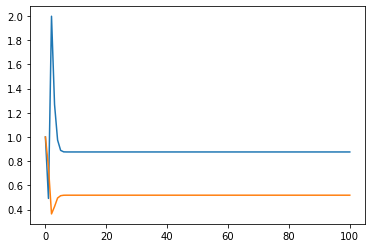

In [18]:
def Newton_system(F,J,x):
    F_value=F(x)
    F_norm=np.linalg.norm(F_value,ord=2)
    i=0
    ix=[x[0]]
    iy=[x[1]]
    ii=[0]
    while (abs(np.linalg.norm(F_value,ord=2))>=10**-6 and i<100):
        delta=np.linalg.solve(J(x),-F(x))
        x=x+delta
        i+=1
        ix.append(x[0])
        iy.append(x[1])
        ii.append(i)
    print(x)
    plt.plot(ii, ix)
    plt.plot(ii, iy)
    plt.show()
    return x
    print(x)
x=Newton_system(F,J,x=np.array([1,1]))

In [19]:
def power_iteration(A, num_simulations: int):
    # Ideally choose a random vector
    # To decrease the chance that our vector
    # Is orthogonal to the eigenvector
    b_k = np.random.rand(A.shape[1])
    print(222)
    for _ in range(num_simulations):
        # calculate the matrix-by-vector product Ab
        b_k1 = np.dot(A, b_k)

        # calculate the norm
        b_k1_norm = np.linalg.norm(b_k1)
        print(b_k1_norm)

        # re normalize the vector
        b_k = b_k1 / b_k1_norm
        k=np.dot(b_k,A*b_k)/np.dot(b_k,b_k)
        
    return b_k

In [20]:
power_iteration(np.array([[42,-14,59,-45],[-14,67,86,59],[59,86,67,-14],[-45,59,-14,42]]), 50)

222
160.57536353456427
159.6729566487391
162.5294148263285
163.65562350439063
164.25670666185374
164.59781854955696
164.79275775513128
164.90391123817298
164.9671267880543
165.0030165184534
165.0233712004809
165.0349083130573
165.04144534811027
165.04514857049008
165.04724620945666
165.04843431350886
165.0491072325165
165.04948835308056
165.04970420555105
165.04982645554992
165.0498956926895
165.0499349055453
165.04995711394776
165.04996969178228
165.04997681529613
165.04998084972976
165.0499831346488
165.04998442872264
165.0499851616269
165.04998557671038
165.0499858117947
165.04998594493566
165.04998602034067
165.0499860630466
165.04998608723326
165.04998610093153
165.04998610868955
165.04998611308335
165.0499861155718
165.04998611698116
165.04998611777935
165.0499861182314
165.04998611848745
165.04998611863243
165.04998611871454
165.04998611876107
165.0499861187874
165.04998611880234
165.04998611881075
165.04998611881555


array([0.18290306, 0.68304212, 0.68304192, 0.18290346])